In [1]:
#test the GPU is available or not?
import tensorflow as tf

device_name = tf.test.gpu_device_name()

if "GPU" not in device_name:
    print("GPU device not found")
    
print('Found GPU at: {}'.format(device_name))

print("GPU", "available (YESS!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

Found GPU at: /device:GPU:0
GPU available (YESS!!!!)


In [2]:
# General Imports
import tensorflow as tf #Fraomwork
import pandas as pd #For data manipulation and analysis
import numpy as np #Mthmetical operation like  materix
import random #Generate randoe number
import os #Intact with Operating System

# Visualization
import matplotlib.pyplot as plt #Plot the graph
import seaborn as sns #Plot high-level graph interphase

# Building Model
from keras.utils import plot_model #utility functions for working with Keras
from tensorflow.keras import models #For working with neural network models
from tensorflow.keras.layers import BatchNormalization #use for batch nurmilization
from tensorflow.keras.layers import MaxPooling2D #Use in CNN for reduce the spetcial dimension
from tensorflow.keras.layers import Conv2D #fundamental building blocks of CNN
from tensorflow.keras.layers import Dense #full connected layer
from tensorflow.keras.layers import Dropout #use in regularization technique
from tensorflow.keras.layers import Flatten #convert multidimensional input data into one-dimensional array
from tensorflow.keras.optimizers import legacy #access the older version of optermizer

# Training Model
from tensorflow.keras.callbacks import EarlyStopping # prevent overfitting by halting training
from tensorflow.keras.callbacks import ReduceLROnPlateau # Fine-tune the training process
from tensorflow.keras.callbacks import ModelCheckpoint # it alow to save best model during training

# Data Processing
from tensorflow.keras.preprocessing.image import ImageDataGenerator #Provide the method such as rotation, zooming, and flipping
from tensorflow.keras.preprocessing.image import img_to_array #Conert the image into numpy array
from tensorflow.keras.preprocessing.image import array_to_img #Conert the numpy arry into image
from tensorflow.keras.preprocessing.image import load_img #load the image into model

In [3]:
# Global variables (setup enviromnt)
SAVE = True
SEED = 111

# Setting seed for consistent results
tf.keras.utils.set_random_seed(SEED)
tf.random.set_seed(SEED)
np.random.seed(SEED)

# Data Visualization updates
%config InlineBackend.figure_format = 'retina' #for high wuslity plot
plt.rcParams["figure.figsize"] = (16, 10) #adjust thee reati and size of plot
plt.rcParams.update({'font.size': 14}) #font size

# Data Classifications
CLASS_TYPES = ["female","male"]
N_TYPES = len(CLASS_TYPES)

In [4]:
# Function for inporting data           
def get_data_labels(directory, shuffle=True, random_state=0):
    """
    Function used for going into the main training directory
    whose directory has sub-class-types.
    """
    from sklearn.utils import shuffle
    import os

    # Lists to store data and labels
    data_path = []
    data_labels = []
    
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)


        # Going into each folder and getting image path
        for image in os.listdir(label_dir):
            image_path = os.path.join(label_dir, image)
            data_path.append(image_path)
            data_labels.append(label)
            
    if shuffle:
        data_path, data_labels = shuffle(data_path, data_labels, random_state=random_state)
            
    return data_path, data_labels

In [5]:
# Setting up file paths for training and testing
##https://www.kaggle.com/datasets/cashutosh/gender-classification-dataset
USER_PATH = r"D:\datascience video\Datasets\gender classification"
train_dir = USER_PATH + r'/Training'
test_dir = USER_PATH  + r'/Validation'

# Getting data using above function
train_paths, train_labels = get_data_labels(train_dir)
test_paths, test_labels = get_data_labels(test_dir)

# Printing traing and testing sample sizes
print('Training')
print(f'Number of Paths: {len(train_paths)}')
print(f'Number of Labels: {len(train_labels)}')
print('\nTesting')
print(f'Number of Paths: {len(test_paths)}')
print(f'Number of Labels: {len(test_labels)}')

Training
Number of Paths: 47009
Number of Labels: 47009

Testing
Number of Paths: 11649
Number of Labels: 11649


Training Counts
{'female': 23243, 'male': 23766}

Testing Counts
{'female': 5841, 'male': 5808}


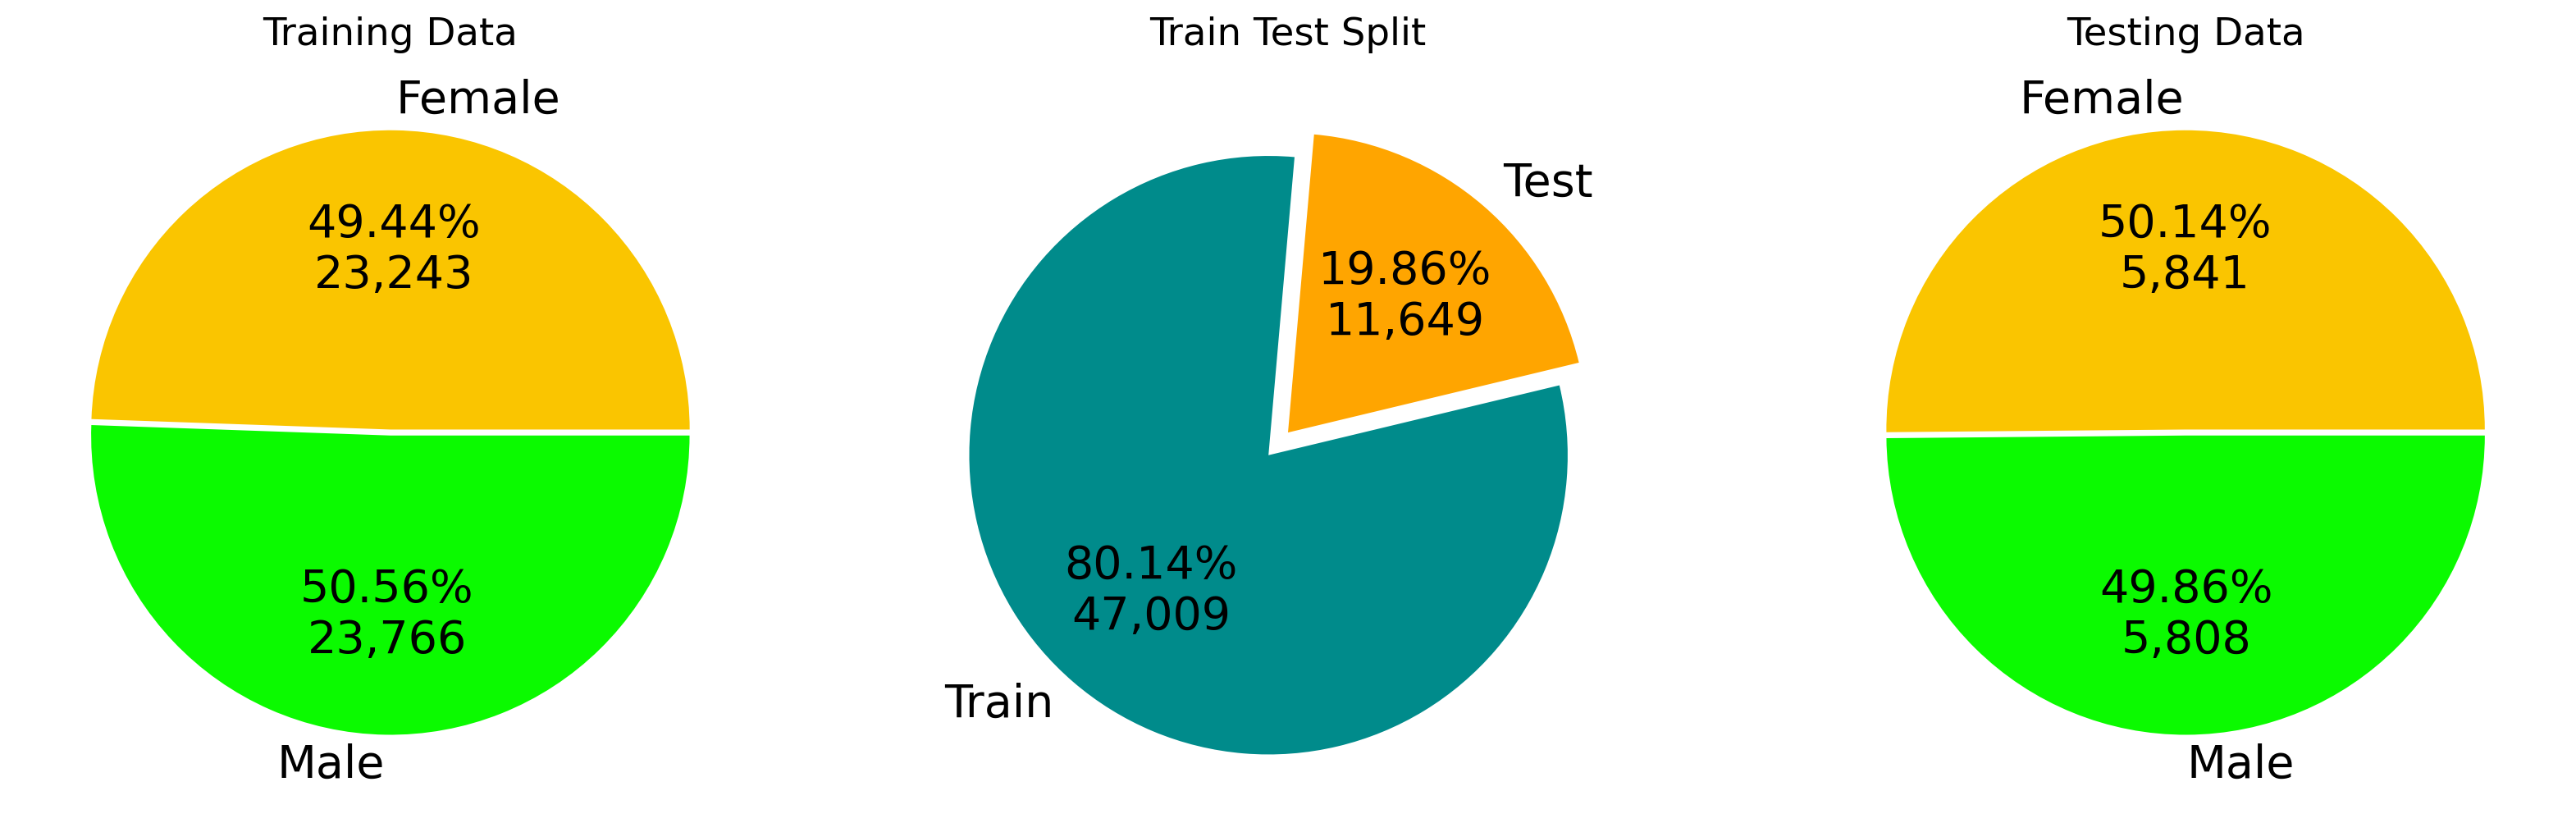

In [6]:
_, ax = plt.subplots(ncols=3, figsize=(20, 14))

# Plotting training data types
class_counts = [len([x for x in train_labels if x == label]) for label in CLASS_TYPES]
print('Training Counts')
print(dict(zip(CLASS_TYPES, class_counts)))

ax[0].set_title('Training Data')
ax[0].pie(
    class_counts,
    labels=[label.title() for label in CLASS_TYPES],
    colors=['#FAC500','#0BFA00', '#0066FA','#FA0000'], 
    autopct=lambda p: '{:.2f}%\n{:,.0f}'.format(p, p * sum(class_counts) / 100),
    explode=tuple(0.01 for i in range(N_TYPES)),
    textprops={'fontsize': 20}
)

# Plotting distribution of train test split
ax[1].set_title('Train Test Split')
ax[1].pie(
    [len(train_labels), len(test_labels)],
    labels=['Train','Test'],
    colors=['darkcyan', 'orange'], 
    autopct=lambda p: '{:.2f}%\n{:,.0f}'.format(p, p * sum([len(train_labels), len(test_labels)]) / 100),
    explode=(0.1, 0),
    startangle=85,
    textprops={'fontsize': 20}
)

# Plotting testing data types
class_counts = [len([x for x in test_labels if x == label]) for label in CLASS_TYPES]
print('\nTesting Counts')
print(dict(zip(CLASS_TYPES, class_counts)))

ax[2].set_title('Testing Data')
ax[2].pie(
    class_counts,
    labels=[label.title() for label in CLASS_TYPES],
    colors=['#FAC500', '#0BFA00', '#0066FA', '#FA0000'],
    autopct=lambda p: '{:.2f}%\n{:,.0f}'.format(p, p * sum(class_counts) / 100),
    explode=tuple(0.01 for i in range(N_TYPES)),  # Explode the slices slightly for better visualization
    textprops={'fontsize': 20}  # Set the font size for the text on the pie chart
)


plt.show()

x reshaped: (1, 150, 150, 3)


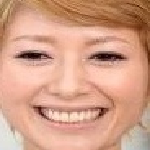

In [7]:
# load the image and preprocessing
# getting image to test output
im = load_img(train_paths[3], target_size=(150, 150))
im = img_to_array(im)

# Reshape it to (1, 150, 150, 3)
im = np.expand_dims(im, axis=0)
print(f'x reshaped: {im.shape}')

# normilzation tensor (by dividing thee max value in the array)
im /= np.max(im) # ~ np.max(img_tensor)

# Convert the array back to the image format
im = array_to_img(im[0])
display(im)

In [8]:
# Function to display a list of images based on the given index
def show_images(paths, label_paths, index_list=range(10), im_size=250, figsize=(12, 8), save=False):
    """
    Show images from a given path based on the inputted
    list indices related to the desired images one wishes
    to see.
    """

    num_images = len(index_list) #total number of images
    num_rows = (num_images + 3) // 4 #(for idspaly and 4 for make sure that it will horizentely)
    
    _, ax = plt.subplots(nrows=num_rows, ncols=4, figsize=figsize)
    ax = ax.flatten()

    for i, index in enumerate(index_list):
        if i >= num_images:
            break
        
        image = load_img(paths[index], target_size=(im_size, im_size))
        ax[i].imshow(image)
        ax[i].set_title(f'{index}: {label_paths[index]}')
        ax[i].axis('off')

    plt.tight_layout()
    
    if save:
        plt.savefig('show_image.pdf')
    else:
        plt.show()

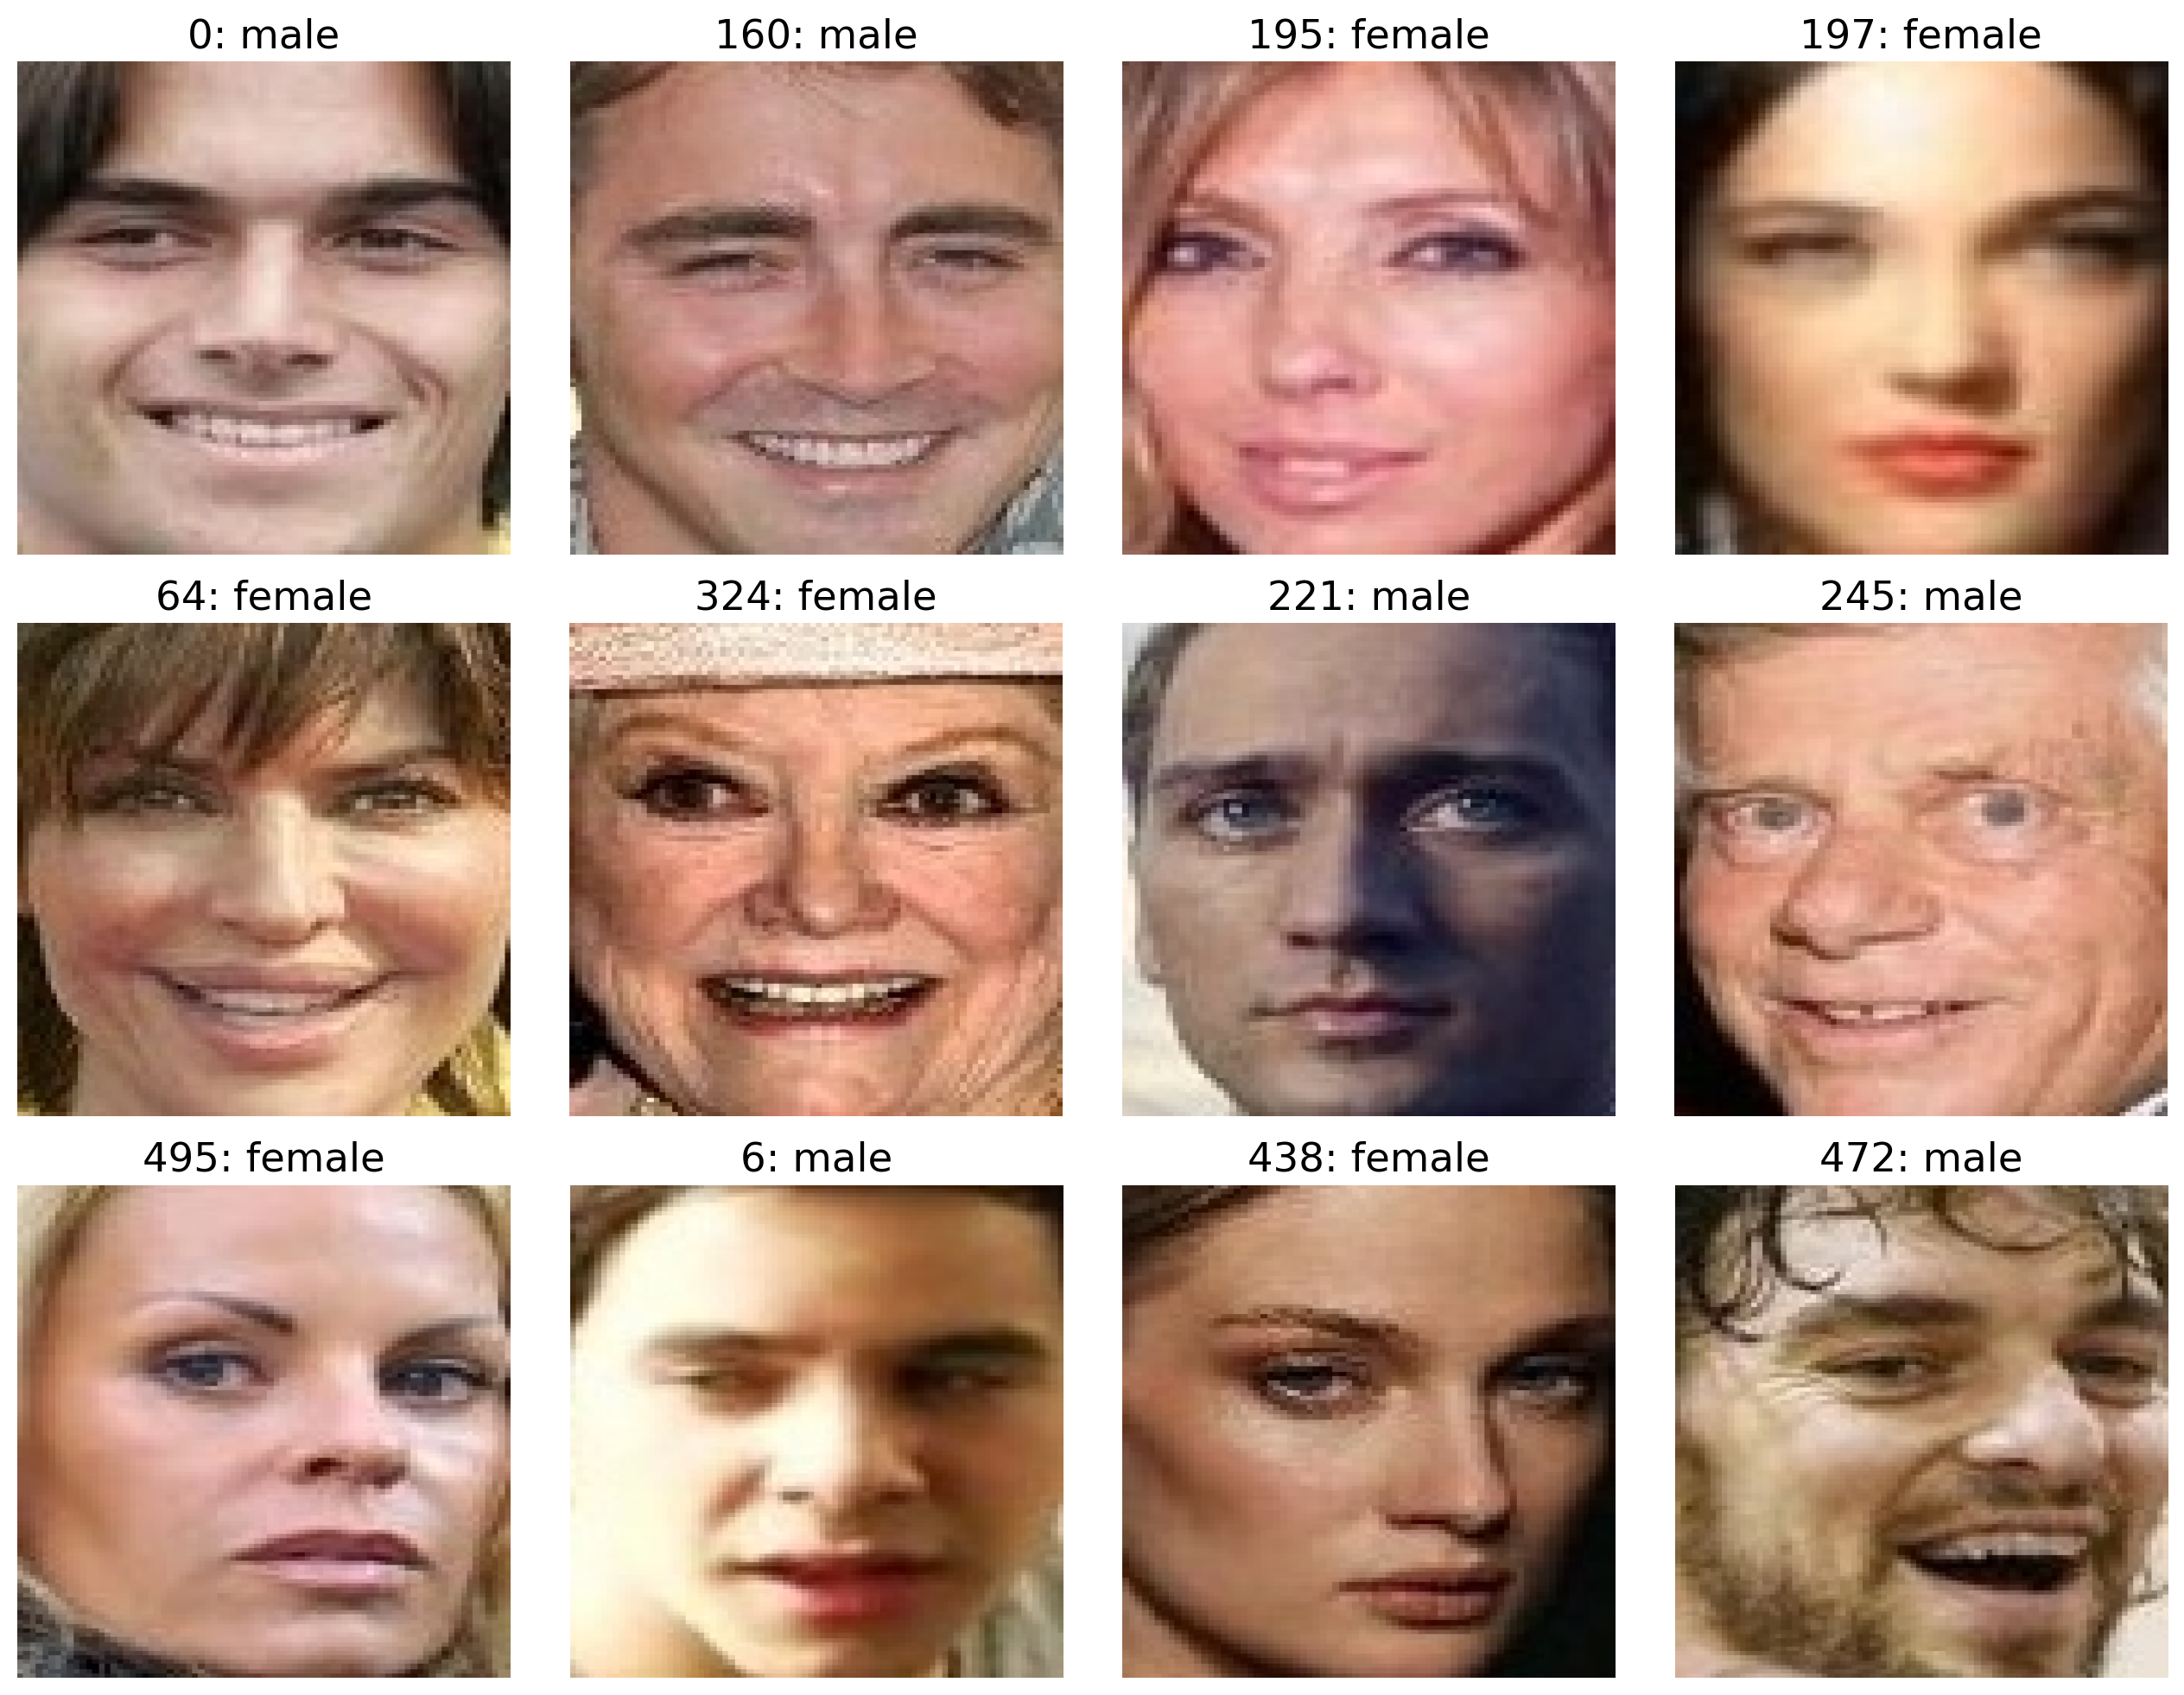

In [9]:
show_images(train_paths, 
            train_labels, 
            index_list=[0, 160, 195, 197,
                        64, 324, 221, 245,
                        495, 6, 438, 472], 
            im_size=350, 
            figsize=(13,10),
            save=SAVE)

In [10]:
# Image size
image_size = (150, 150)

# Training batch size
batch_size = 32

In [11]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, # numormalize the scale of images
                                   rotation_range=10, #range of random roatation
                                   brightness_range=(0.85, 1.15), #random range of brightness
                                   width_shift_range=0.002, #it helps simulate variations in object position within the image
                                   height_shift_range=0.002,# //
                                   shear_range=12.5,# change the shap size along with x anf y axis
                                   zoom_range=0, #zoom
                                   horizontal_flip=True,
                                   vertical_flip=False,
                                   fill_mode="nearest") #Strategy for filling in newly created pixels during transformations using (nearest)


# applying the generator to training data with constant seed
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=image_size,
                                                    batch_size=batch_size,
                                                    class_mode="categorical", #type of label arry return it may be binnary
                                                    seed=SEED)

# No augmentation of the test data, just rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# applying the generator to testing data with constant seed
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=image_size,
                                                  batch_size=batch_size,
                                                  class_mode="categorical",
                                                  shuffle=False,
                                                  seed=SEED)

Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.


In [12]:
class_indices_train = train_generator.class_indices #value are assing to crosspondind each class
class_indices_train_list = list(train_generator.class_indices.keys())


# Displaying categorical types
print("Categorical types for the training data:")
print(class_indices_train)

Categorical types for the training data:
{'female': 0, 'male': 1}


In [13]:
def show_ImageDataGenerator(ImageDataGenerator, num_samples=5, figsize=(12, 12), save=False):
    """
    Function to viusalize how the ImageDataGenerator augments the data
    """
    
    # Generate augmented  batch of samples
    augmented_samples = train_generator.next()

    # Extract images from the batch
    images = augmented_samples[0][:num_samples]

    # Display the augmented images
    fig, axes = plt.subplots(1, num_samples, figsize=figsize)
    
    for i, ax in enumerate(axes):
        ax.imshow(images[i])
        ax.axis('off') # remove the grid 
        
    plt.tight_layout() # adjust the layout  sure the paceing b/w them
        
    if save:
        plt.savefig('show_ImageDataGenerator.pdf')
        
    plt.show()

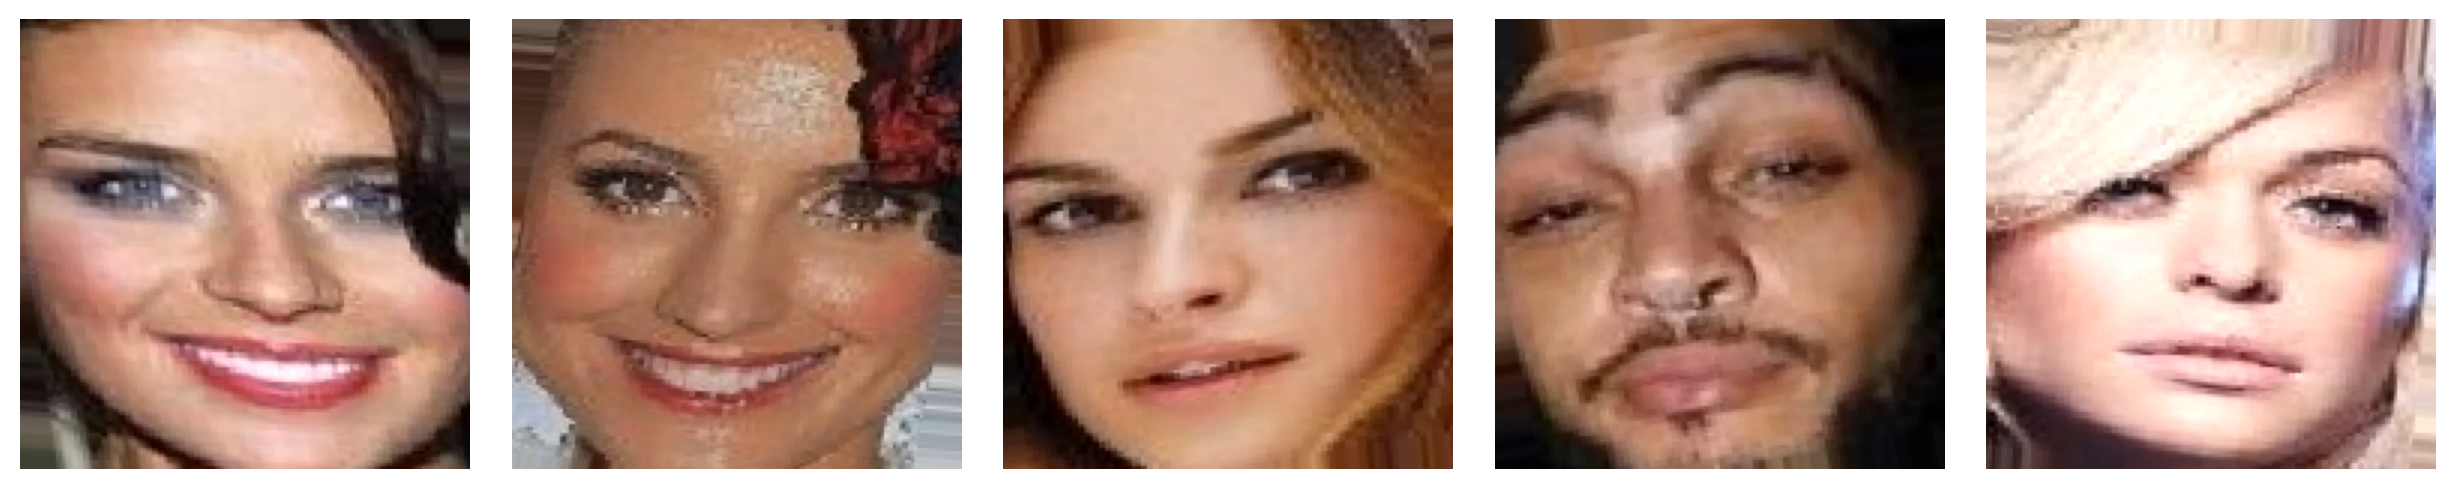

In [14]:
show_ImageDataGenerator(train_datagen, num_samples=5, figsize=(12.5, 8), save=SAVE)

In [15]:
# Image shape: height, width, RBG
image_shape = (image_size[0], image_size[1], 3)

# Training epochs
epochs = 5

# Steps per epoch
steps_per_epoch = train_generator.samples // batch_size#batches comeplete in one epoch

# Validation steps
validation_steps = test_generator.samples // batch_size

print(f'Image shape: {image_shape}')
print(f'Epochs: {epochs}')
print(f'Batch size: {batch_size}')
print(f'Steps Per Epoch: {steps_per_epoch}')
print(f'Validation steps: {validation_steps}')

Image shape: (150, 150, 3)
Epochs: 5
Batch size: 32
Steps Per Epoch: 1469
Validation steps: 364


In [16]:
from tensorflow.keras.callbacks import EarlyStopping # stops training when it stops improving.
from tensorflow.keras.callbacks import ReduceLROnPlateau #reduces the learning rate when a metric has stopped improving

EarlyStopping(monitor='val_loss', min_delta=0, patience=8, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)

In [17]:
#model
model_2 = models.Sequential()

# Convolutional layer 1
model_2.add(Conv2D(32, (4, 4), activation="relu", input_shape=image_shape))
model_2.add(MaxPooling2D(pool_size=(3, 3)))

# Convolutional layer 2
model_2.add(Conv2D(64, (4, 4), activation="relu"))
model_2.add(MaxPooling2D(pool_size=(3, 3)))

# Convolutional layer 3
model_2.add(Conv2D(128, (4, 4), activation="relu"))
model_2.add(MaxPooling2D(pool_size=(3, 3))) #

# Convolutional layer 4
model_2.add(Conv2D(128, (4, 4), activation="relu"))
model_2.add(Flatten())

# Full connect layers
model_2.add(Dense(512, activation="relu"))
model_2.add(Dropout(0.5, seed=SEED))
model_2.add(Dense(N_TYPES, activation="softmax"))

model_2.summary()


optimizer = legacy.Adam(learning_rate=0.001, beta_1=0.869, beta_2=0.995)

model_2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics= ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 147, 147, 32)      1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       131200    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

In [ ]:
import os
from keras.models import save_model
model_2_es = EarlyStopping(monitor='loss', min_delta=1e-9, patience=8, verbose=True)
model_2_rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, verbose=True)
# Training the model
history_2 = model_2.fit(train_generator,
                        steps_per_epoch=steps_per_epoch,
                        epochs=epochs,
                        validation_data=test_generator,
                        validation_steps=validation_steps,
                        callbacks=[model_2_es, model_2_rlr])

# Save the model weights
model_weights_path = 'model_weights.h5'
model_2.save_weights(model_weights_path)

print("Model weights saved successfully!")


Epoch 1/5
1469/1469 [==============================] - 1122s 753ms/step - loss: 0.2436 - accuracy: 0.8980 - val_loss: 0.1383 - val_accuracy: 0.9494 - lr: 0.0010
Epoch 2/5
1469/1469 [==============================] - 731s 497ms/step - loss: 0.1548 - accuracy: 0.9438 - val_loss: 0.1328 - val_accuracy: 0.9511 - lr: 0.0010
Epoch 3/5
1469/1469 [==============================] - 414s 282ms/step - loss: 0.1393 - accuracy: 0.9497 - val_loss: 0.1229 - val_accuracy: 0.9553 - lr: 0.0010
Epoch 4/5
1469/1469 [==============================] - 418s 284ms/step - loss: 0.1313 - accuracy: 0.9533 - val_loss: 0.1064 - val_accuracy: 0.9616 - lr: 0.0010
Epoch 5/5
1469/1469 [==============================] - ETA: 0s - loss: 0.1255 - accuracy: 0.9559

In [ ]:
# Compile the model
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Load the saved model weights
model_2.load_weights('model_weights.h5')

# Evaluate the model on the validation data
val_loss, val_accuracy = model_2.evaluate(test_generator, steps=validation_steps)

# Print the validation loss and accuracy
print(f'Validation Loss: {val_loss:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')

In [ ]:
from tensorflow.keras.preprocessing import image

# Get a random image path from the test directory
random_image_path = random.choice(test_paths)

# Load the image and preprocess it
img = image.load_img(random_image_path, target_size=image_size)
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Normalize pixel values
# Load the saved model weights
model_2.load_weights('model_weights.h5')
# Add an extra dimension to the image array to match the input shape of the model
img_array = np.expand_dims(img_array, axis=0)

# Get the predicted probabilities for each class
predictions = model_2.predict(img_array)

# Get the predicted class label
predicted_class_index = np.argmax(predictions)
predicted_class = class_indices_train_list[predicted_class_index]

# Display the image and the predicted class
plt.imshow(img)
plt.axis('off')
plt.title(f'Predicted Class: {predicted_class}')
plt.show()
